<a href="https://colab.research.google.com/github/sashank1326/ML_Practice/blob/main/ML_Featues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House_Price dataset**

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/ML_LAB/house_price_train.csv")
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [ ]:
# Coonstant Features
x_train = df.select_dtypes(include=['string'])

# Now detect constant features
const_feature = [
    feature for feature in x_train.columns
    if x_train[feature].std() == 0
]

print("Constant features:", const_feature)

Constant features: []


In [ ]:
#Quasi Constant Feature
quasi = []
for i in df.columns:
  freq = df[i].value_counts(normalize = True).values[0]
  if freq>0.99:
    quasi.append(i)

print("Quasi-constant features:", quasi)

Quasi-constant features: ['Street', 'Utilities', 'PoolArea']


In [ ]:
#duplicate
duplicates = []
cols = df.columns

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        if df[cols[i]].equals(df[cols[j]]):
            duplicates.append(cols[j])

print("Duplicate features:", duplicates)



Duplicate features: []


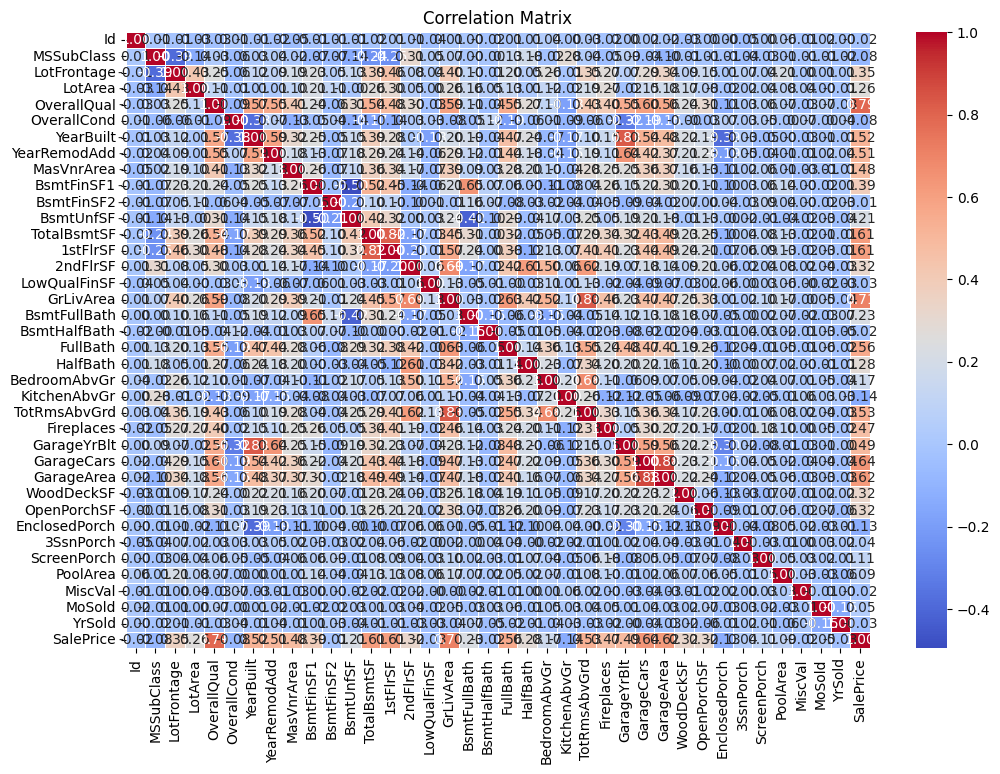

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only = True)

# Display the correlation matrix
#print(correlation_matrix)

#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['SalePrice'])  # Features
y = df['SalePrice']  # Target variable

Xy_train = X.copy()
Xy_train['SalePrice'] = y
correlation_with_target = Xy_train.corr()['SalePrice'].sort_values(ascending=False)

print(correlation_with_target)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

X_train = df.select_dtypes(include=['float64', 'int64']).drop(columns=['SalePrice'])  # Features
y_train = df['SalePrice']  # Target variable

# Handle missing values using SimpleImputer (mean imputation)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)  # Imputed feature matrix

# Encode categorical features using LabelEncoder (for categorical columns)
X_train_encoded = pd.DataFrame(X_train_imputed, columns=X_train.columns)
for col in X_train_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col].astype(str))

mi_scores = mutual_info_classif(X_train_encoded, y_train, random_state=42)

mi_df = pd.DataFrame({'Feature': X_train_encoded.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)
print(mi_df)


          Feature  MI Score
22   KitchenAbvGr  2.821149
19       FullBath  2.034976
26     GarageCars  1.811739
4     OverallQual  0.930986
24     Fireplaces  0.876763
5     OverallCond  0.820908
21   BedroomAbvGr  0.806964
23   TotRmsAbvGrd  0.538440
16      GrLivArea  0.386647
20       HalfBath  0.368093
17   BsmtFullBath  0.345868
1      MSSubClass  0.336836
6       YearBuilt  0.293309
27     GarageArea  0.289965
7    YearRemodAdd  0.256349
12    TotalBsmtSF  0.229321
25    GarageYrBlt  0.214533
29    OpenPorchSF  0.179433
13       1stFlrSF  0.160517
36         YrSold  0.158140
2     LotFrontage  0.153071
8      MasVnrArea  0.142714
3         LotArea  0.137874
14       2ndFlrSF  0.123251
28     WoodDeckSF  0.088113
9      BsmtFinSF1  0.081860
35         MoSold  0.043460
32    ScreenPorch  0.024783
11      BsmtUnfSF  0.014808
18   BsmtHalfBath  0.013417
31      3SsnPorch  0.000413
0              Id  0.000000
10     BsmtFinSF2  0.000000
15   LowQualFinSF  0.000000
30  EnclosedPorch  0

In [ ]:
#Chi Square
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

X = df.select_dtypes(include=['float64', 'int64'])  # Only numeric columns
y = df['SalePrice']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
f_score = chi2(X_train.fillna(0), y_train)  # Handle NaNs by replacing with 0

# Step 4: Print the Chi-Square scores
print(f_score)

(array([1.30897689e+05, 1.68512153e+04, 1.32229520e+04, 1.06167456e+07,
       2.95504605e+02, 1.28660696e+02, 3.78342311e+02, 1.56928524e+02,
       2.32312848e+05, 3.25583428e+05, 2.79208972e+05, 2.37327894e+05,
       1.41254579e+05, 1.00149926e+05, 3.81759587e+05, 2.03853316e+05,
       1.56218858e+05, 3.81960001e+02, 4.61393724e+02, 1.53386922e+02,
       4.43063677e+02, 1.37949251e+02, 2.54427678e+01, 2.89157420e+02,
       4.73324726e+02, 6.86053536e+04, 2.60131354e+02, 7.64054348e+04,
       1.16601749e+05, 6.36008433e+04, 8.70972870e+04, 1.49644166e+05,
       1.11067973e+05, 3.46954458e+05, 5.29749970e+06, 6.24193954e+02,
       5.23408670e-01, 3.83958093e+07]), array([0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.99969495, 1.        ,
       0.99997562, 1.        , 1.        , 1.      

In [ ]:
#Anova
from sklearn.feature_selection import f_classif

f_score, p_value = f_classif(X_train.fillna(0), y_train)

print("F-scores:", f_score)
print("p-values:", p_value)


F-scores: [0.86771783 0.8701582  1.12384727 5.50114265 5.06883139 1.02381491
 2.21610074 1.71523164 2.31709169 1.51005359 0.79512768 1.46073926
 2.04947331 2.13777734 1.54857327 0.80276188 3.0347228  1.11267032
 0.71648527 2.36417515 1.44637288 1.16900186 0.8552375  1.70692244
 1.5869018  1.23061278 2.76032568 2.44113822 1.3884063  1.33553352
 0.76745568 1.01470475 0.92727753 1.07521606 3.33305677 0.95387346
 1.11112192        inf]
p-values: [9.56388359e-01 9.53171242e-01 7.92582854e-02 5.78666504e-86
 8.98073335e-79 3.87927276e-01 9.46019574e-22 4.37398413e-11
 5.59282209e-24 3.42794689e-07 9.97117585e-01 2.46987215e-06
 4.18707480e-18 4.96786493e-20 6.93280355e-08 9.95928667e-01
 1.10818353e-39 9.86236772e-02 9.99969501e-01 5.09030100e-25
 4.31895464e-06 2.96833913e-02 9.70260936e-01 6.40851978e-11
 1.35312363e-08 6.12326183e-03 9.55804432e-34 1.01082726e-26
 3.78748286e-05 2.41035472e-04 9.99278636e-01 4.29819286e-01
 8.18657639e-01 1.90491898e-01 5.59424663e-46 7.15390629e-01
 1.01

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
